In [43]:
import torchquantum as tq
import torchquantum.functional as tqf
from torchquantum.plugins.qiskit_plugin import tq2qiskit
import torch

# Basic Usage 1

In [29]:
state = tq.QuantumState(n_wires=2)
state.h(wires=0)
state.cnot(wires=[0, 1])
tqf.h(state, wires=1)
tqf.x(state, wires=1)

print(state)
print(tq.measure(state, n_shots=1024))

QuantumState 2 wires 
 state: tensor([[ 0.5000+0.j,  0.5000+0.j, -0.5000+0.j,  0.5000+0.j]])
[OrderedDict([('00', 265), ('01', 255), ('10', 258), ('11', 246)])]


In [30]:
# state.to(torch.device('cuda'))

In [34]:
state.get_states_1d()

tensor([[ 0.5000+0.j,  0.5000+0.j, -0.5000+0.j,  0.5000+0.j]])

In [36]:
state.states

tensor([[[ 0.5000+0.j,  0.5000+0.j],
         [-0.5000+0.j,  0.5000+0.j]]])

In [37]:
print(state)

QuantumState 2 wires 
 state: tensor([[ 0.5000+0.j,  0.5000+0.j, -0.5000+0.j,  0.5000+0.j]])


# Basic Usage 2

In [20]:
x = tq.QuantumDevice(n_wires=2)

tqf.hadamard(x, wires=0)
tqf.x(x, wires=1)
tqf.cnot(x, wires=[0, 1])

print(x)
print(tq.measure(x, n_shots=1024))

QuantumDevice 2 wires with states: tensor([[0.0000+0.j, 0.7071+0.j, 0.7071+0.j, 0.0000+0.j]])
[OrderedDict([('00', 0), ('01', 502), ('10', 522), ('11', 0)])]


In [23]:
x.states

tensor([[[0.0000+0.j, 0.7071+0.j],
         [0.7071+0.j, 0.0000+0.j]]])

# Q-Model

In [48]:
class QModel(tq.QuantumModule):
    def __init__(self):
        super().__init__()
        self.n_wires = 2
        self.q_device = tq.QuantumDevice(n_wires=self.n_wires)
        self.rx_0 = tq.RX(has_params=True, trainable=True)
        self.ry_0 = tq.RY(has_params=True, trainable=True)
    
    def forward(self, x):
        self.rx_0(x, wires=0)
        self.ry_0(x, wires=1)
        return x

In [49]:
q_model = QModel()

In [50]:
circ = tq2qiskit(x, q_model)

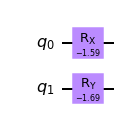

In [51]:
circ.draw('mpl')